#  Proteomics / Phosphorylation analysis in Drosophila embryo
## SILAC dataset
We have three replicates (B1, B2, B3) and two conditions labelled with Heavy(H) and Light(L) SILAC isotopes. The experiment aims to identify changes at proteomic and p-proteomic levels.


### Import some library 

In [50]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import missingno as msno
sns.set(style="ticks")

def make_plot(df=pd.DataFrame(), x='', y='', hue=''):
    fig, ax = plt.subplots()
    sns.boxplot(x=x, y=y, hue=hue, data=df, palette="PRGn", ax=ax)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_title(hue)
    return ax
    

def make_scatter_matrix(in_df):
    #sns.set(font_scale = 1.5)
    #sns.set(style="white")
    def corrfunc(x, y, **kws):
        r, _ = stats.pearsonr(x, y)
        ax = plt.gca()
        ax.annotate("r = {:.2f}".format(r),
                    xy=(.1, .9), xycoords=ax.transAxes)
    
    selection =  in_df
    #selection = selection+1
    #selection = selection[selection.sum(axis=1)>5]
    print (selection.head())
    #selection = selection
    g = sns.PairGrid(selection, palette=["red"], size=2 )
    g.map_upper(plt.scatter, s=4)
    g.map_diag(sns.distplot, kde=False) 
    g.map_lower(sns.kdeplot, cmap="Blues_d") 
    g.map_lower(corrfunc)
    
    g.savefig('q1.svg')
    g.savefig('q1.png')
    g.savefig('q1.pdf')
   
    plt.show()
 

### Let's start with some sanity check of the dataset
### We expect the typical median score of the peptides identified with Andromeda to be > 50

In [54]:
import warnings
warnings.filterwarnings('ignore')
#use the evidence file for a sanity check
df = pd.read_table('evidence.txt')
#make log10 of intensity for better visualisation
df['log10intensity']=np.log10(df['Intensity'])
df['log10intensityL']=np.log10(df['Intensity L'])
df['log10intensityH']=np.log10(df['Intensity H'])

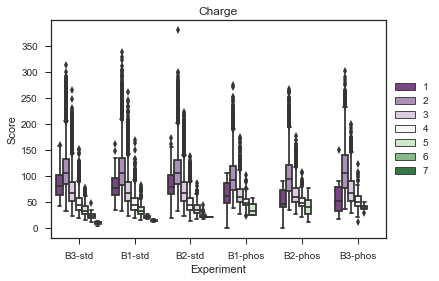

In [3]:
#this plot visualise the peptide score vs charge
make_plot(df=df, x="Experiment", y="Score", hue="Charge")

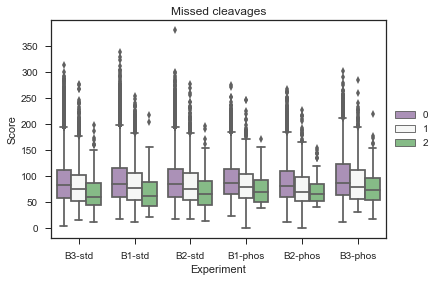

In [4]:
#this plot visualise the peptide score vs the number of miss cleavages in the peptide
make_plot(df=df, x="Experiment", y="Score", hue="Missed cleavages")

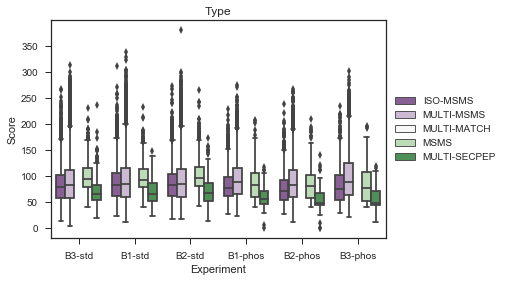

In [6]:
make_plot(df=df, x="Experiment", y="Score", hue="Type")
#note
#The type of MS/MS spectrum this sequence is derived from.
#ISO-MSMS – MS/MS from an identified isotope cluster.
#MULTI-MSMS – MS/MS from an identified labeling cluster.
#MSMS – MS/MS for an unidentified peak.

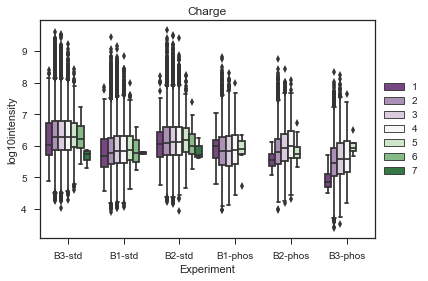

In [7]:
make_plot(df=df, x="Experiment", y="log10intensity", hue="Charge")
#here actually we have an alarm bell. Generally, we observere a median intensity > 7
#This would indicate too less starting material or loss of sample during preparation

No handles with labels found to put in legend.


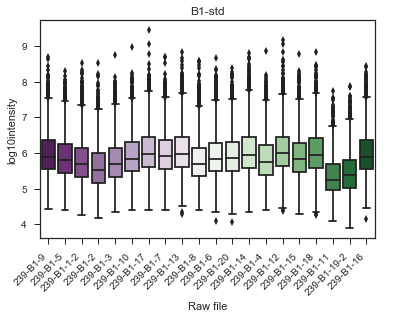

No handles with labels found to put in legend.


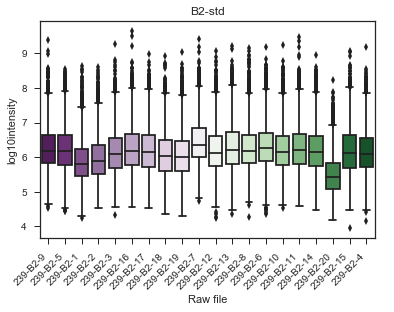

No handles with labels found to put in legend.


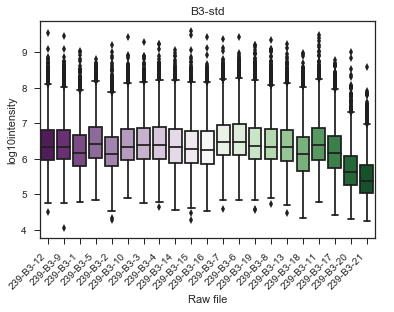

In [52]:
#analysing median intensity for each protein raw files 
import warnings
warnings.filterwarnings('ignore')
for exp in ['B1-std','B2-std','B3-std']:
    ax=make_plot(df=df[df["Experiment"]==exp], 
          x="Raw file", y="log10intensity", hue=None)
    plt.xticks(rotation=45, ha="right")
    ax.set_title(exp)
    plt.show()

No handles with labels found to put in legend.


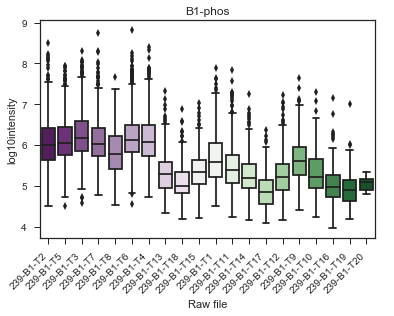

No handles with labels found to put in legend.


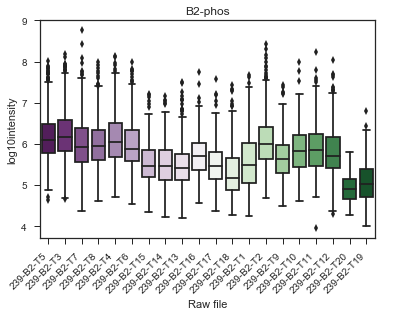

No handles with labels found to put in legend.


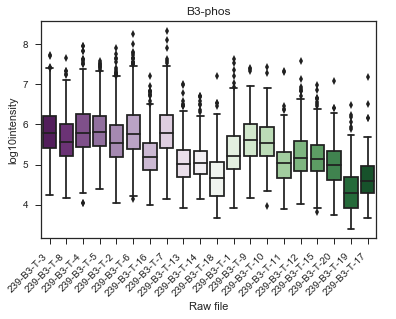

In [53]:
#analysing median intensity for each peptide raw files 
import warnings
warnings.filterwarnings('ignore')
for exp in ['B1-phos','B2-phos','B3-phos']:
    ax=make_plot(df=df[df["Experiment"]==exp], 
          x="Raw file", y="log10intensity", hue=None)
    plt.xticks(rotation=45, ha="right")
    ax.set_title(exp)
    plt.show()

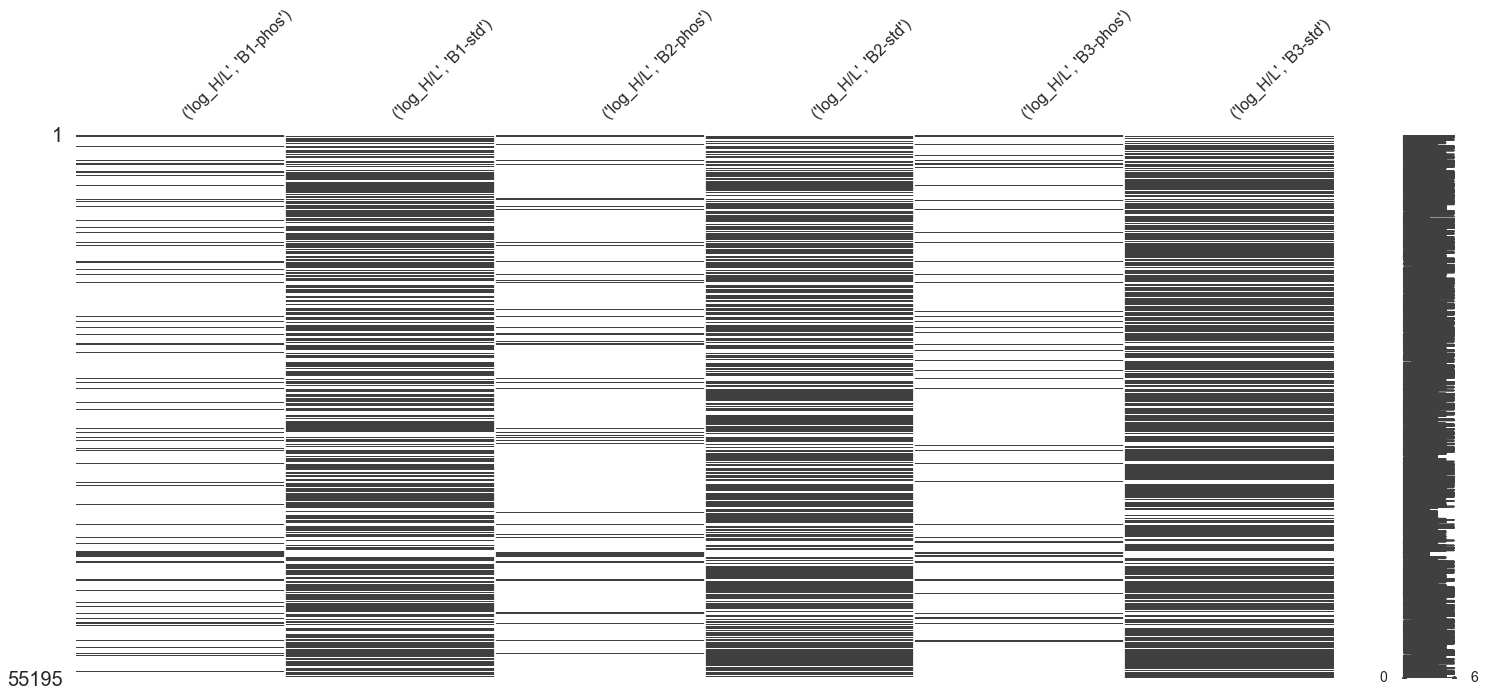

In [84]:
#an overview of the missing values in each experiment
selection = df[['Modified sequence',
                "Experiment",
                'Intensity L',
                'Intensity H']].groupby(['Modified sequence',"Experiment"]).median()
selection['log_H/L']=np.log10(selection['Intensity H']/selection['Intensity L'])
selection.head()
del selection['Intensity H']
del selection['Intensity L']
temp = selection.unstack(level=1)
temp.head()
msno.matrix(temp)

In [106]:
list_df = []

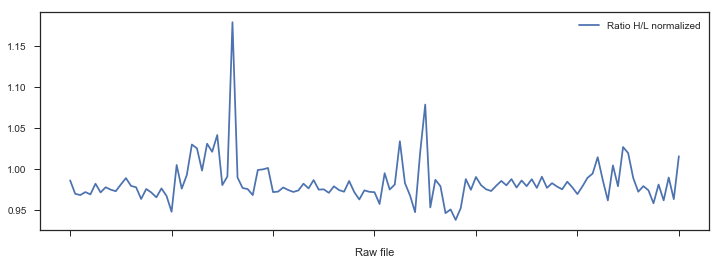

In [131]:
#an overview of the average H/L ratio  in each raw file
selection = df[[
                'Raw file',
                'Ratio H/L normalized']].groupby(['Raw file']).median()
temp = selection.unstack(level=1)
selection.plot(figsize=(12,4))
list_df.append(selection)
#selection.head()

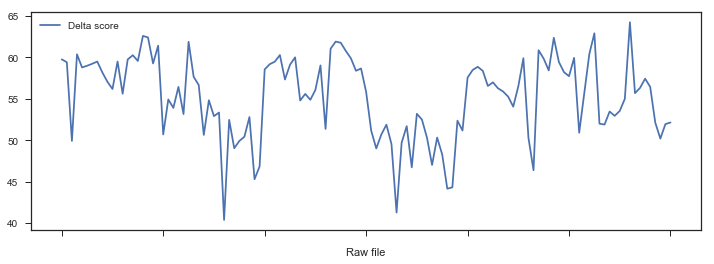

In [130]:
#an overview of the average H/L ratio  in each raw file
selection = df[[
                'Raw file',
                'Delta score']].groupby(['Raw file']).median()
temp = selection.unstack(level=1)
selection.plot(figsize=(12,4))
list_df.append(selection)
#selection.head()

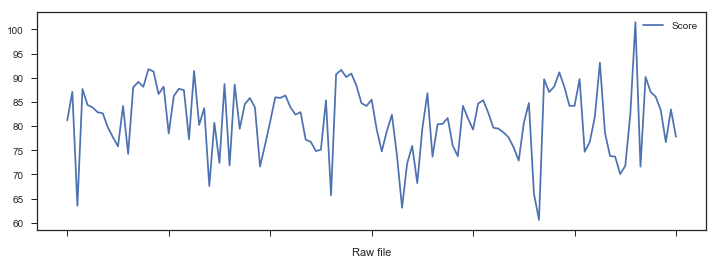

In [129]:
#an overview of the average H/L ratio  in each raw file
selection = df[[
                'Raw file',
                'Score']].groupby(['Raw file']).median()
temp = selection.unstack(level=1)
selection.plot(figsize=(12,4))
list_df.append(selection)
#selection.head()

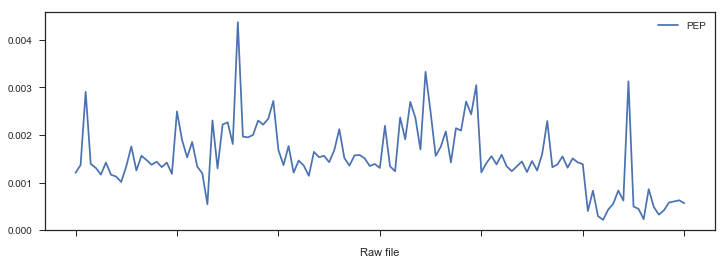

In [128]:
#an overview of the average H/L ratio  in each raw file
selection = df[[
                'Raw file',
                'PEP']].groupby(['Raw file']).median()
temp = selection.unstack(level=1)
selection.plot(figsize=(12,4))
list_df.append(selection)
#selection.head()

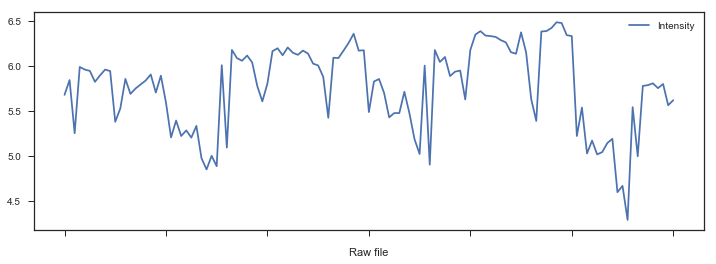

In [127]:
selection = df[[
                'Raw file',
                'Intensity']].groupby(['Raw file']).median()
selection['Intensity']=np.log10(selection['Intensity'])
temp = selection.unstack(level=1)
selection.plot(figsize=(12,4))
list_df.append(selection)
#selection.head()

In [ ]:
'''
not much informative
merge_df = pd.concat(list_df,axis=1)
fig,ax = plt.subplots(figsize=(12,12))
sns.heatmap(merge_df.T.corr(method='pearson'),ax=ax)
'''

### A look to the fraction of missed cleavages

Text(0.5,1,'fraction of Missed cleavages')

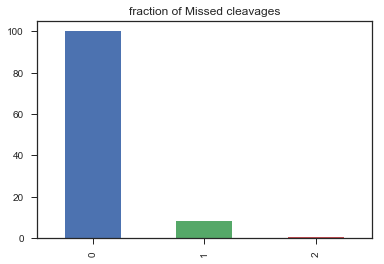

In [23]:
temp = df["Missed cleavages"].value_counts()/df["Missed cleavages"].value_counts()[0]*100
temp.plot(kind='bar')
plt.title('fraction of Missed cleavages')
#generally we see less that 10% for 1 or 2 Missed cleavages

''

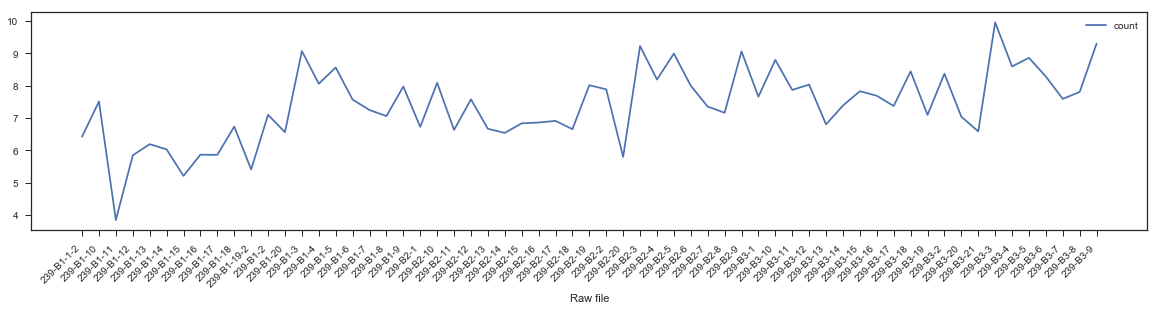

In [163]:
#detailed percentage of missed cleavages x raw files
selection = df[ (df["Missed cleavages"]>0) & ( (df["Experiment"]=='B1-std') 
                                              | (df["Experiment"]=='B2-std')
                                              | (df["Experiment"]=='B3-std')
                                             ) ]
selection['count']=1
selection = selection[[
                'Raw file',
                "count"]].groupby(['Raw file']).sum()

selection2 = df[ (df["Missed cleavages"]==0) & ( (df["Experiment"]=='B1-std') 
                                              | (df["Experiment"]=='B2-std')
                                              | (df["Experiment"]=='B3-std')
                                             ) ]
selection2['count']=1
selection2 = selection2[[
                'Raw file',
                "count"]].groupby(['Raw file']).sum()


selection = selection/selection2*100
selection.plot(figsize=(20,4))
plt.xticks(np.arange(len(selection.index.values)), 
           selection.index.values, 
           rotation=45, ha="right")
''

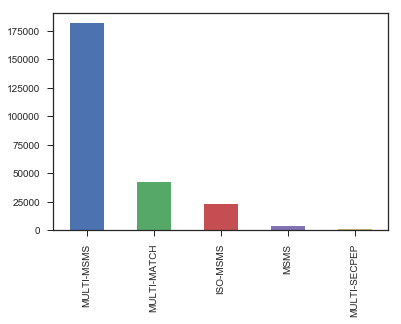

In [26]:
#This is actually the second alarm bell
#for a silac experiments we expect the ISO-MSMS count 
#to be higher respect to the other form of
#ms type
temp = df["Type"].value_counts()
temp.plot(kind='bar')

## Let's now visualize the reproducibility of the dataset at the protein level

In [164]:
import warnings
warnings.filterwarnings('ignore')
#load data and remove rubbish
df = pd.read_table('proteinGroups.txt')
df = df[df['Only identified by site']!='+']
df = df[df['Reverse']!='+']
df = df[df['Potential contaminant']!='+']


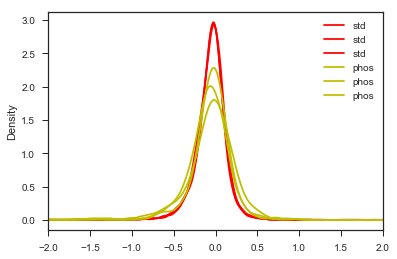

In [30]:
temp = df['Ratio H/L normalized B1-std'].replace([np.inf, -np.inf], np.nan)
ax = np.log2(temp.dropna()).plot(kind='kde', label='std',c='r')
temp = df['Ratio H/L normalized B2-std'].replace([np.inf, -np.inf], np.nan)
ax = np.log2(temp.dropna()).plot(kind='kde',ax=ax,label='std',c='r')
temp = df['Ratio H/L normalized B3-std'].replace([np.inf, -np.inf], np.nan)
ax = np.log2(temp.dropna()).plot(kind='kde',ax=ax,label='std',c='r')

temp = df['Ratio H/L normalized B1-phos'].replace([np.inf, -np.inf], np.nan)
ax = np.log2(temp.dropna()).plot(kind='kde',ax=ax,label='phos',c='y')
temp = df['Ratio H/L normalized B2-phos'].replace([np.inf, -np.inf], np.nan)
ax = np.log2(temp.dropna()).plot(kind='kde',ax=ax,label='phos',c='y')
temp = df['Ratio H/L normalized B3-phos'].replace([np.inf, -np.inf], np.nan)
ax = np.log2(temp.dropna()).plot(kind='kde',ax=ax,label='phos',c='y')
ax.set_xlim(-2,2)
plt.legend()
plt.show()
#log ratio forms a gaussian around zero, good

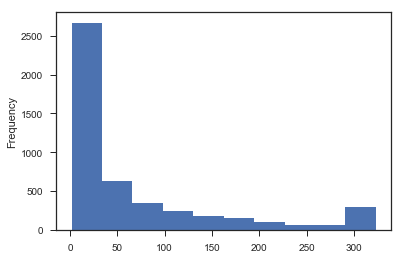

In [31]:
#generally, we observe a higher amount of protein with a score > 300 (highest in maxquant)
temp = df['Score'].replace([np.inf, -np.inf], np.nan)
temp = temp.dropna()
ax = temp.plot(kind='hist', label='score')
plt.show()

           B1        B2        B3
150  0.007052  0.286053  0.083247
151  0.088006  0.008774  0.100305
152 -0.084410 -0.121000  0.028852
153 -0.030236 -0.058788 -0.140205
154 -0.358491 -0.353764 -0.419198


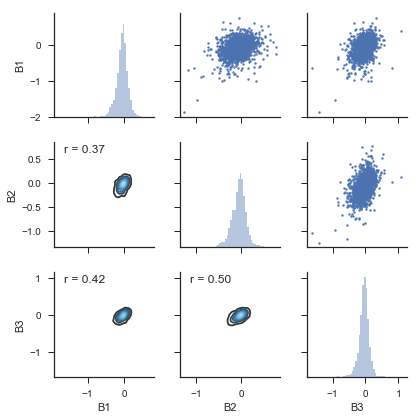

In [165]:
import warnings
warnings.filterwarnings('ignore')
temp = df[['Ratio H/L normalized B1-std', 'Ratio H/L normalized B2-std', 'Ratio H/L normalized B3-std']]  
temp.columns = ['B1','B2','B3']
temp = np.log2(temp)
make_scatter_matrix(temp.dropna()) 

### B2 vs B3 correlate better, they are also the samples with the higher intensity value on average (see above intensity vs experiment vs charge plot)

### Does the correlation improve by increasing score or intensity thresholds?

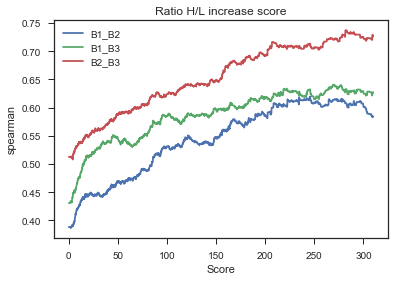

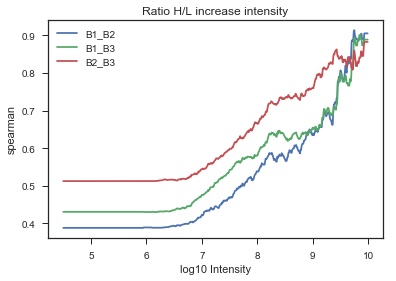

In [169]:
import warnings
warnings.filterwarnings('ignore')
def correlete(df=pd.DataFrame(), method='spearman'):
    temp = df[['Ratio H/L B1-std', 'Ratio H/L B2-std', 'Ratio H/L B3-std', 'Score']]
    list_a = []
    list_b = []
    list_c = []
    start = 0
    end = 310
    every = 0.1
    for item in np.arange(start, end, every):
        selection = temp[temp['Score']>item]
        del selection['Score']
        selection = np.log2(selection)    
        p = selection.corr(method=method)
        #print p
        #print p.iloc[0,1],'p.iloc[0,1]'
        #print p.iloc[0,2],'p.iloc[0,2]'
        #print p.iloc[1,2],'p.iloc[1,2]'
                
        a, b, c = p.iloc[0,1],p.iloc[0,2],p.iloc[1,2]
        list_a.append(a)
        list_b.append(b) 
        list_c.append(c)  
    res = pd.DataFrame()
    res['B1_B2']=list_a
    res['B1_B3']=list_b
    res['B2_B3']=list_c
    res['x']=np.arange(start, end, every)
    ax = res.plot(x='x',y='B1_B2')
    ax = res.plot(x='x',y='B1_B3',ax=ax)
    ax = res.plot(x='x',y='B2_B3',ax=ax)
    ax.set_xlabel('Score')
    ax.set_ylabel(method) 
    ax.set_title('Ratio H/L increase score')
    #plt.title('Ratio H/L reproducibility')
    plt.show()
    
    
    temp = df[['Ratio H/L B1-std', 'Ratio H/L B2-std', 'Ratio H/L B3-std', 'Intensity']]
    temp['Intensity']=np.log10(temp['Intensity'])
    list_a = []
    list_b = []
    list_c = []
    start = 4.5
    end = 10
    every = 0.01
    for item in np.arange(start, end, every):
        selection = temp[temp['Intensity']>item]
        #print  item, selection.shape
        del selection['Intensity']
        selection = np.log10(selection)    
        p = selection.corr(method=method)
        a, b, c = p.iloc[0,1],p.iloc[0,2],p.iloc[1,2]
        list_a.append(a)
        list_b.append(b) 
        list_c.append(c)  
    res = pd.DataFrame()
    res['B1_B2']=list_a
    res['B1_B3']=list_b
    res['B2_B3']=list_c
    res['x']=np.arange(start, end, every)
    ax = res.plot(x='x',y='B1_B2')
    ax = res.plot(x='x',y='B1_B3',ax=ax)
    ax = res.plot(x='x',y='B2_B3',ax=ax)
    ax.set_xlabel('log10 Intensity')
    ax.set_ylabel(method)
    ax.set_title('Ratio H/L increase intensity')
    #plt.title('Ratio H/L reproducibility')
    plt.show()
    
#for m in ['pearson', 'kendall', 'spearman']:
correlete(df, method='spearman')

### The correletion improve, expecially for B2/B3 couple

           B1        B2        B3
157  0.105946  0.060877  0.006908
159  0.235359  0.196229  0.296428
164 -0.034160 -0.072377 -0.041996
172 -0.149009 -0.214073 -0.180430
177  0.086512  0.028852  0.094641


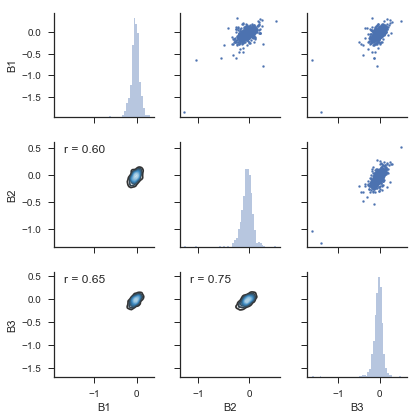

In [170]:
import warnings
warnings.filterwarnings('ignore')
temp = df[df['Score']>160]
temp = temp[np.log10(df['Intensity'])>7]
temp = temp[['Ratio H/L normalized B1-std', 'Ratio H/L normalized B2-std', 'Ratio H/L normalized B3-std']]  
temp.columns = ['B1','B2','B3']
temp = np.log2(temp)
make_scatter_matrix(temp)  



## Let's have a look at the most changing proteins   

In [48]:
import warnings
warnings.filterwarnings('ignore')
temp = df[df['Score']>160]
temp = temp[np.log10(df['Intensity'])>7]
temp2 = temp[['Ratio H/L normalized B1-std', 'Ratio H/L normalized B2-std', 'Ratio H/L normalized B3-std']]  
temp2['Protein IDs']=[n.split(' ')[0] for n in temp['Protein IDs']]
temp2['desc']=[' '.join(n.split(' ')[1:]) for n in temp['Protein IDs']]
temp2['avg_B2_B3']=temp2[['Ratio H/L normalized B2-std', 'Ratio H/L normalized B3-std']].mean(axis=1)
temp2.sort_values(by='avg_B2_B3',inplace=True)
temp2.to_csv('test.txt',sep='\t')

In [51]:
temp2[['Protein IDs','desc','avg_B2_B3']].head()

,Protein IDs,desc,avg_B2_B3
2428,tr|B7Z001|B7Z001_DROME,"Fatty acid synthase 1, isoform C OS=Drosophila...",0.397335
2616,tr|Q8INW9|Q8INW9_DROME,"Fondue, isoform A OS=Drosophila melanogaster O...",0.405305
4617,tr|Q9VVU1|Q9VVU1_DROME,CG3902 OS=Drosophila melanogaster OX=7227 GN=G...,0.738895
2017,tr|A0A126GUM8|A0A126GUM8_DROME,"Lingerer, isoform L OS=Drosophila melanogaster...",0.762645
2062,tr|Q9VNC4|Q9VNC4_DROME,"Uncharacterized protein, isoform B OS=Drosophi...",0.780035


In [52]:
temp2[['Protein IDs','desc','avg_B2_B3']].tail()

,Protein IDs,desc,avg_B2_B3
230,tr|E1JGV6|E1JGV6_DROME,"Nucleolar protein at 60B, isoform C OS=Drosoph...",1.15010
4345,tr|Q9VQI5|Q9VQI5_DROME,LP04564p OS=Drosophila melanogaster OX=7227 GN...,1.18295
3018,tr|Q7K4H1|Q7K4H1_DROME,LD40680p OS=Drosophila melanogaster OX=7227 GN...,1.18640
159,tr|A0A0B4LEY4|A0A0B4LEY4_DROME,PAN2-PAN3 deadenylation complex catalytic subu...,1.18690
3214,tr|Q9VLY9|Q9VLY9_DROME,"Thioester-containing protein 2, isoform B OS=D...",1.43755


# Let's move on visualising the phospho-proteomic results

In [175]:
warnings.filterwarnings('ignore')
#load phosphoprotein 
df = pd.read_table('Phospho (STY)Sites.txt')
df['filter']=[1 if '__' in n else 0 for n in df['Protein']]
df = df[df['filter']==0]
df  = df[df['Localization prob']>0.75]
df.head()

,Proteins,Positions within proteins,Leading proteins,Protein,Fasta headers,Localization prob,Score diff,PEP,Score,Delta score,...,Best localization scan number,Best score evidence ID,Best score MS/MS ID,Best score raw file,Best score scan number,Best PEP evidence ID,Best PEP MS/MS ID,Best PEP raw file,Best PEP scan number,filter
51,sp|A1A708|Y4951_DROME Uncharacterized protein ...,212,sp|A1A708|Y4951_DROME Uncharacterized protein ...,sp|A1A708|Y4951_DROME Uncharacterized protein ...,>sp|A1A708|Y4951_DROME Uncharacterized protein...,0.857649,7.92057,1.372710e-04,89.344,56.598,...,2204,18281,26983,239-B2-T3,1629,18281,26983,239-B2-T3,1629,0
56,sp|A1A708|Y4951_DROME Uncharacterized protein ...,200,sp|A1A708|Y4951_DROME Uncharacterized protein ...,sp|A1A708|Y4951_DROME Uncharacterized protein ...,>sp|A1A708|Y4951_DROME Uncharacterized protein...,0.940677,13.13640,8.499820e-03,75.877,14.533,...,826,191990,276257,239-B3-T-1,818,191990,276257,239-B3-T-1,818,0
57,sp|A1A708|Y4951_DROME Uncharacterized protein ...,202,sp|A1A708|Y4951_DROME Uncharacterized protein ...,sp|A1A708|Y4951_DROME Uncharacterized protein ...,>sp|A1A708|Y4951_DROME Uncharacterized protein...,0.995308,23.38920,4.952110e-03,85.493,20.782,...,905,191992,276259,239-B3-T-2,905,191992,276259,239-B3-T-2,905,0
58,sp|A1A708|Y4951_DROME Uncharacterized protein ...,442,sp|A1A708|Y4951_DROME Uncharacterized protein ...,sp|A1A708|Y4951_DROME Uncharacterized protein ...,>sp|A1A708|Y4951_DROME Uncharacterized protein...,1.000000,81.80930,1.248860e-07,118.050,70.414,...,13584,248135,357982,239-B1-T8,10080,248135,357982,239-B1-T8,10080,0
59,sp|A1A708|Y4951_DROME Uncharacterized protein ...,443,sp|A1A708|Y4951_DROME Uncharacterized protein ...,sp|A1A708|Y4951_DROME Uncharacterized protein ...,>sp|A1A708|Y4951_DROME Uncharacterized protein...,1.000000,81.70200,4.174620e-03,83.317,56.192,...,13584,248139,357990,239-B2-T8,13584,248136,357984,239-B1-T8,10255,0


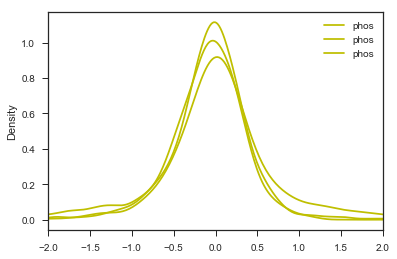

In [176]:
fig,ax = plt.subplots()
temp = df['Ratio H/L normalized B1-phos___1'].replace([np.inf, -np.inf], np.nan)
ax = np.log2(temp.dropna()).plot(kind='kde',ax=ax,label='phos',c='y')
temp = df['Ratio H/L normalized B2-phos___1'].replace([np.inf, -np.inf], np.nan)
ax = np.log2(temp.dropna()).plot(kind='kde',ax=ax,label='phos',c='y')
temp = df['Ratio H/L normalized B3-phos___1'].replace([np.inf, -np.inf], np.nan)
ax = np.log2(temp.dropna()).plot(kind='kde',ax=ax,label='phos',c='y')
ax.set_xlim(-2,2)
plt.legend()
plt.show()
#check the log data is centred around zero

          B1        B2        B3
64  0.313594  0.050885 -0.328471
66  0.533264 -0.019741 -0.174719
67  0.359071  0.476537 -0.306680
68  0.028993  0.091124  0.115433
69 -0.262971 -0.834776  1.796847


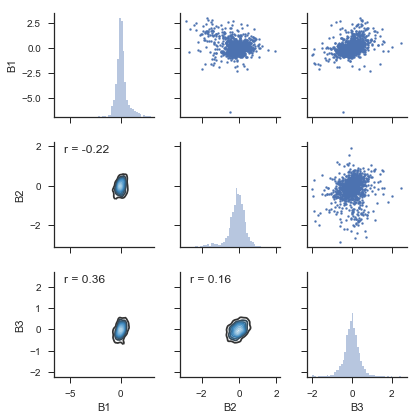

In [177]:
warnings.filterwarnings('ignore')
temp  = df[['Ratio H/L normalized B1-phos___1',
            'Ratio H/L normalized B2-phos___1',
            'Ratio H/L normalized B3-phos___1']]
temp.columns = ['B1', 'B2', 'B3']
make_scatter_matrix(np.log2(temp[['B1', 'B2', 'B3']]).dropna()) 

### the phosphosites have less reproducibility than the protein dataset
#### let's see if we can improve reproducibility by increasing score or intensity 

          B1        B2        B3     Score
64  0.313594  0.050885 -0.328471  2.149219
66  0.533264 -0.019741 -0.174719  2.047820
67  0.359071  0.476537 -0.306680  1.819570
68  0.028993  0.091124  0.115433  2.307924
69 -0.262971 -0.834776  1.796847  1.720143
2.47845105315 Score


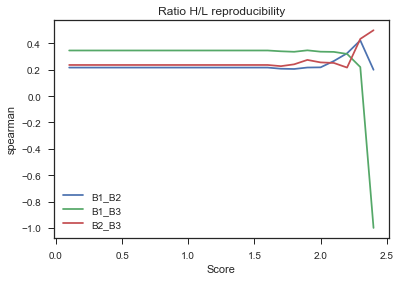

In [178]:
warnings.filterwarnings('ignore')
def correlate(df=pd.DataFrame(), 
              method='pearson', 
              tag='-phos',
              ref_col = 'Score'):
  
    print (df.head() )       
    score_max = df[ref_col].max()
    list_a = []
    list_b = []
    list_c = []
    start = 0.1
    end = score_max
    every = 0.1
    print (score_max, ref_col)
    for item in np.arange(start, end, every):
        #print item
        selection = df[df[ref_col]>item]
        #print selection.head()
        del selection[ref_col]
        selection = np.log2(selection)  
        #print selection.head()
        p = selection.corr(method=method)
        a, b, c = p.iloc[0,1],p.iloc[0,2],p.iloc[1,2]
        list_a.append(a)
        list_b.append(b) 
        list_c.append(c)  
        
        
    res = pd.DataFrame()
    res['B1_B2']=list_a
    res['B1_B3']=list_b
    res['B2_B3']=list_c
    res['x']=np.arange(start, end, every)
    ax = res.plot(x='x',y='B1_B2')
    ax = res.plot(x='x',y='B1_B3',ax=ax)
    ax = res.plot(x='x',y='B2_B3',ax=ax)
    ax.set_xlabel('Score')
    ax.set_ylabel(method)    
    ax.set_title('Ratio H/L reproducibility')
    plt.show()

temp = np.log2(temp)
temp['Score']=np.log10(df['Score'])
correlate(df=temp.dropna(), ref_col = 'Score', method='spearman')

          B1        B2        B3     Score
64  0.313594  0.050885 -0.328471  6.318543
66  0.533264 -0.019741 -0.174719  7.267829
67  0.359071  0.476537 -0.306680  7.730047
68  0.028993  0.091124  0.115433  7.522327
69 -0.262971 -0.834776  1.796847  6.392380
9.34590279648 Score


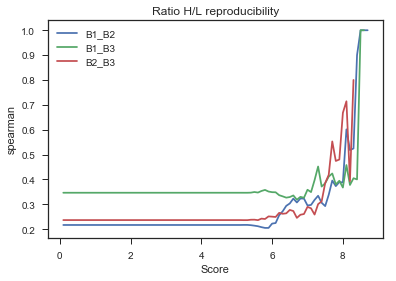

In [179]:
warnings.filterwarnings('ignore')
temp['Score']=np.log10(df['Intensity'])
correlate(df=temp.dropna(), ref_col = 'Score', method='spearman')

### Generally, we can see an improving trend, especially for intensity  
### I would tend to be optimistic, by increasing the amount of sample loaded on the mass spectrometer we might be able to have better results. 